In [52]:
import os
import sys
sys.path.append('/usr/src/app/models/research/object_detection') # point to your tensorflow dir
sys.path.append('/usr/src/app/models/research/slim') # point ot your slim dir
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random
import tfinterface as ti
import cv2

%matplotlib inline

In [53]:
traffic_lights_model = ti.estimator.SavedModelPredictor('/usr/src/app/data/capstone_models/mobilenetv1/saved_model')

INFO:tensorflow:Restoring parameters from /usr/src/app/data/capstone_models/mobilenetv1/saved_model/variables/variables


In [54]:
print(traffic_lights_model)

SavedModelPredictor with feed tensors {u'inputs': <tf.Tensor 'ToFloat:0' shape=(?, ?, ?, 3) dtype=float32>} and fetch_tensors {u'detection_classes': <tf.Tensor 'detection_classes:0' shape=(?, 100) dtype=float32>, u'detection_boxes': <tf.Tensor 'detection_boxes:0' shape=(?, 100, 4) dtype=float32>, u'detection_scores': <tf.Tensor 'detection_scores:0' shape=(?, 100) dtype=float32>, u'num_detections': <tf.Tensor 'num_detections:0' shape=(?,) dtype=float32>}


In [55]:
predictions = traffic_lights_model.predict(inputs=[img])

[ 2.  2.  2.]
[ 0.9118104   0.27118728  0.08998431]


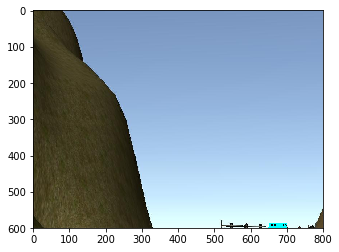

[ 2.  2.  2.]
[ 0.98094559  0.96999657  0.92772788]


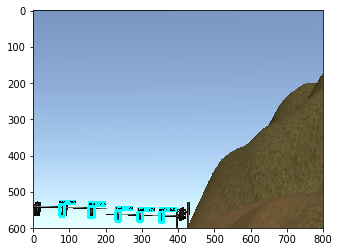

[ 2.  2.  2.]
[ 0.99675328  0.99486804  0.94660819]


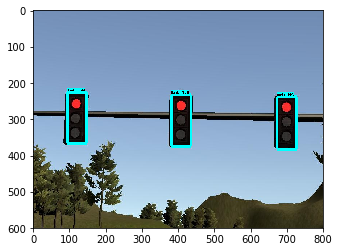

[ 2.  2.  2.]
[ 0.99969733  0.99958771  0.99855012]


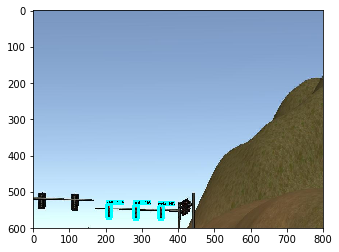

[ 2.  2.  2.]
[ 0.99927884  0.99017501  0.9803586 ]


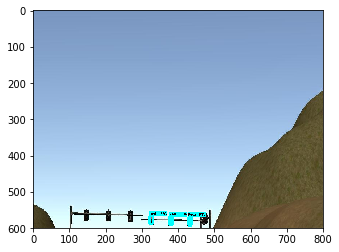

[ 2.  2.  2.]
[ 0.98881137  0.98802501  0.83867288]


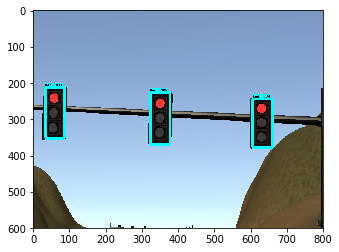

[ 2.  2.  2.]
[ 0.99927264  0.99603492  0.71387023]


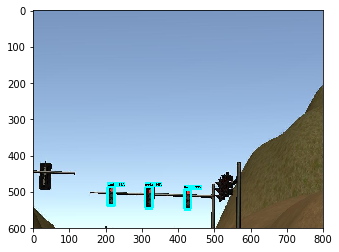

[ 3.  3.  3.]
[ 0.93311429  0.75555843  0.55809832]


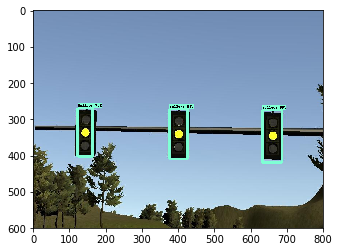

[ 2.  2.  2.]
[ 0.9994086   0.97939533  0.49264696]


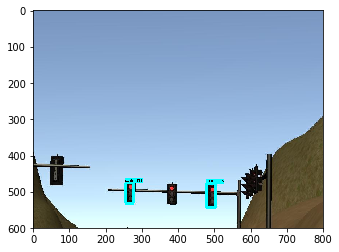

[ 2.  2.  2.]
[ 0.99349689  0.9847222   0.8786698 ]


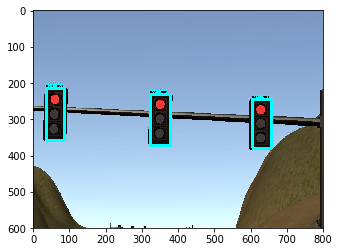

[ 1.  1.  2.]
[ 0.80454135  0.60150915  0.20009945]


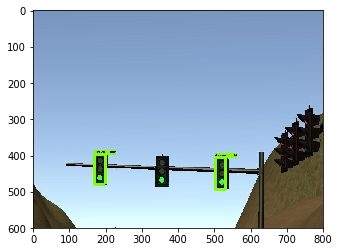

In [58]:
PATH_TO_IMGS = r'/usr/src/app/data/TFRecords/sim_data_capture'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

img_new = cv2.imread('/usr/src/app/data/TFRecords/sim_data_capture/left0033.jpg')
img = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
plt.imshow(img)
predictions = traffic_lights_model.predict(inputs=[img])
PATH_TO_LABELS = r'/usr/src/app/data/config/label_map.pbtxt'
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

for idx, img_path in enumerate(TEST_IMGS):
    img_new = cv2.imread(img_path)
    img = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
    image_np = np.array(img, dtype=np.uint8)
    predictions = traffic_lights_model.predict(inputs=[img])
    detection_classes = predictions['detection_classes']
    detection_boxes = predictions['detection_boxes']
    detection_scores = predictions['detection_scores']
    print(detection_classes[0][0:3])
    print(detection_scores[0][0:3])
    vis_util.visualize_boxes_and_labels_on_image_array(
                    img, 
                    np.squeeze(detection_boxes),
                    np.squeeze(detection_classes).astype(np.int32),
                    np.squeeze(detection_scores),
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    line_thickness=8)
    plt.imshow(img)
    plt.show()
    if idx == 10:
        break